In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics
import re
import time
import string
import spacy
import nltk # natural language tool kite
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [5]:
# load the dataset
tweets=pd.read_csv('D:\Study\Excelr DS\Assignments\AS-11-Text-Mining\Elon_musk.csv',encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets.rename({'Text':'Tweets'},axis=1,inplace=True)
tweets

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
#creating a copy
tweets1 = tweets.copy()

## Basic Analysis of the Data

#### Number of Words

We shall see the number of words present in each tweet.

In [7]:
tweets1['word_count'] = tweets1['Tweets'].apply(lambda x: len(str(x).split(" ")))
tweets1.head()

,Tweets,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


#### Number of characters

We shall see the number of characters present in each tweet.

In [8]:
tweets1['char_count'] = tweets1['Tweets'].str.len() ## this also includes spaces
tweets1.head()

,Tweets,word_count,char_count
0,@kunalb11 Im an alien,4,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82
2,@joerogan @Spotify Great interview!,4,35
3,@gtera27 Doge is underestimated,4,31
4,@teslacn Congratulations Tesla China for amazi...,17,104


#### Number of special characters

We shall see the number of special characters for each tweet

In [9]:
tweets1['hashtags'] = tweets1['Tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tweets1.head()

,Tweets,word_count,char_count,hashtags
0,@kunalb11 Im an alien,4,22,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,82,0
2,@joerogan @Spotify Great interview!,4,35,0
3,@gtera27 Doge is underestimated,4,31,0
4,@teslacn Congratulations Tesla China for amazi...,17,104,0


#### Descriptives

In [10]:
tweets1.describe()

,word_count,char_count,hashtags
count,1999.000000,1999.000000,1999.000000
mean,10.554777,78.442721,0.007504
std,6.693406,44.617029,0.128297
min,1.000000,3.000000,0.000000
25%,4.000000,39.000000,0.000000
50%,9.000000,68.000000,0.000000
75%,17.000000,129.000000,0.000000
max,30.000000,191.000000,4.000000


1. The average word count of the review is 20.
2. The average number of characters in the review is 114.
3. The average number of hashtags are 0.0075 with the maximum count of 4.

#### Percentage of links attached in the tweets

<AxesSubplot:ylabel='Tweets'>

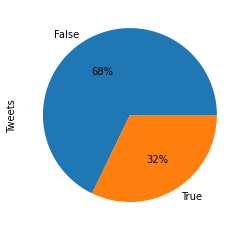

In [11]:
links = tweets1.Tweets.str.contains('https://').value_counts() / len(tweets1)
links.plot(kind='pie',autopct='%1.0f%%')

Around 32% of the tweets have a link attached to it.

#### Percentage of user tags in the tweets

<AxesSubplot:ylabel='Tweets'>

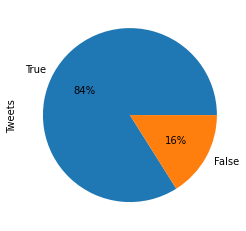

In [12]:
tags = tweets1.Tweets.str.contains('@').value_counts() / len(tweets1)
tags.plot(kind='pie',autopct='%1.0f%%')

Around 84% of the tweets have users tagged in it.

## General text preprocessing

In [13]:
# Joinining all the reviews into single paragraph 
df = [Tweets.strip() for Tweets in tweets.Tweets] # remove both the leading and the trailing characters
df = [Tweets for Tweets in df if Tweets] # removes empty strings, because they are considered in Python as False
df[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [14]:
# Joining the list into one string/text
text = ' '.join(df)
text[0:1000]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zarna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text[0:1000]

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [17]:
no_punc_text = re.sub("[^A-Za-z" "]+"," ",no_punc_text).lower() #remove special character
# no_punc_text = re.sub("[0-9" "]+"," ",no_punc_text) #remove numbers
# no_punc_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', no_punc_text).lower() #remove hyperlink
no_punc_text[0:1000]

'kunalb i m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox httpstco wfkmyu oj frodo was the underdoge all thought he would fail himself most of all httpstcozgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest httpstco rwe uhsts geoffkeighley unrealengine it s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u f u f this is true power haha httpstcofc uhqsd o freewalletorg any crypto wallet tha

In [18]:
#Tokenization
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb', 'i', 'm', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'httpstco']


In [19]:
len(text_tokens)

22406

In [20]:
#importing given stopwords file
with open("D:\Study\Excelr DS\Assignments\AS-11-Text-Mining\stop.txt") as stop_words:
    stop_words = stop_words.read()
    print(stop_words[0:50])

a
a's
able
about
above
according
accordingly
acros


In [21]:
stop_tokens = [word for word in text_tokens if not word in stop_words]
print(stop_tokens[0:40])

['kunalb', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdoge', 'thought', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', 'haha', 'flcnhvy', 'anonyx', 'tweets']


In [22]:
# Joinining all the reviews into single paragraph 
stop_string = " ".join(stop_tokens)
stop_string[0:1000]

'kunalb alien idaacarmack ray tracing cyberpunk hdr nextlevel joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution year happy year ox httpstco wfkmyu oj frodo underdoge thought fail httpstcozgxjfdzzrm owensparks flcnhvy anonyx haha flcnhvy anonyx tweets represent realworld allocation entertaining outcome givedirectly agree clubhouse kanyewest httpstco rwe uhsts geoffkeighley unrealengine bought dogecoin lil toddler hodler joshmanmode issues sentencing bit high freewalletorg fixing freewalletorg unlock account astrojordy true power haha httpstcofc uhqsd freewalletorg crypto wallet private keys avoided costs freewalletorg sucks spacex nasa selected falcon heavy launch elements lunar gateway mission httpstco pwt ajtourville blkmdl rationaletienne adamklotz predict cash flow starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical economic endeavor httpstco skqx rationaletienne adamklotz spacex pass deep ch

### Normalizing the data

We have two methods for normalizing the text:

1. Stemming :
> With stemming, a word is cut off at its stem, the smallest unit of that word from which you can create the descendant words. You just saw an example of this above with “watch.” Stemming simply truncates the string using common endings, so it will miss the relationship between “feel” and “felt,” for example.
  
  2. Lemmatization:
  
  >    Lemmatization seeks to address this issue. This process uses a data structure that relates all forms of a word back to its simplest form, or lemma. Because lemmatization is generally more powerful than stemming, it’s the only normalization strategy offered by spaCy.
  
We shall use Lemmatization as normalization technique.

In [23]:
# Normalize the data
lower_words=[Text.lower() for Text in stop_tokens]
print(lower_words[0:50])

['kunalb', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdoge', 'thought', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', 'haha', 'flcnhvy', 'anonyx', 'tweets', 'represent', 'realworld', 'allocation', 'entertaining', 'outcome', 'givedirectly', 'agree', 'clubhouse', 'kanyewest', 'httpstco']


In [24]:
# Lemmatization
#import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

kunalb alien idaacarmack ray tracing cyberpunk hdr nextlevel joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution year happy year ox httpstco wfkmyu oj frodo underdoge thought fail httpstcozgxjfdzzrm owensparks flcnhvy anonyx haha flcnhvy anonyx tweets represent realworld allocation entertaining outcome givedirectly agree clubhouse kanyewest httpstco rwe uhsts geoffkeighley unrealengine bought dogecoin lil toddler hodler joshmanmode issues sentencing bit high freewalletorg fixing freewalletorg unlock account astrojordy true power haha httpstcofc uhqsd freewalletorg crypto wallet private keys avoided costs freewalletorg sucks spacex nasa selected falcon heavy launch elements lunar gateway mission httpstco pwt ajtourville blkmdl rationaletienne adamklotz


In [25]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['kunalb', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimate', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdoge', 'think', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', 'haha', 'flcnhvy', 'anonyx', 'tweet', 'represent', 'realworld', 'allocation', 'entertaining', 'outcome', 'givedirectly', 'agree', 'clubhouse', 'kanyew', 'httpstco', 'rwe', 'uhst', 'geoffkeighley', 'unrealengine', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'joshmanmode', 'issue', 'sentence', 'bit', 'high', 'freewalletorg', 'fix', 'freewalletorg', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'httpstcofc', 'uhqsd', 'freewalletorg', 'crypto', 'wallet', 'private', 'key', 'avoid', 'cost', 'freewalletorg', 'suck', 'spacex', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'element', 'lunar', '

In [26]:
clean_reviews=' '.join(lemmas)
clean_reviews[:1000]

'kunalb alien idaacarmack ray trace cyberpunk hdr nextlevel joerogan spotify great interview gtera doge underestimate teslacn congratulations tesla china amazing execution year happy year ox httpstco wfkmyu oj frodo underdoge think fail httpstcozgxjfdzzrm owensparks flcnhvy anonyx haha flcnhvy anonyx tweet represent realworld allocation entertaining outcome givedirectly agree clubhouse kanyew httpstco rwe uhst geoffkeighley unrealengine buy dogecoin lil toddler hodler joshmanmode issue sentence bit high freewalletorg fix freewalletorg unlock account astrojordy true power haha httpstcofc uhqsd freewalletorg crypto wallet private key avoid cost freewalletorg suck spacex nasa select falcon heavy launch element lunar gateway mission httpstco pwt ajtourville blkmdl rationaletienne adamklotz predict cash flow starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical economic endeavor httpstco skqx rationaletienne adamklotz spacex pass deep chasm negative cash flow year

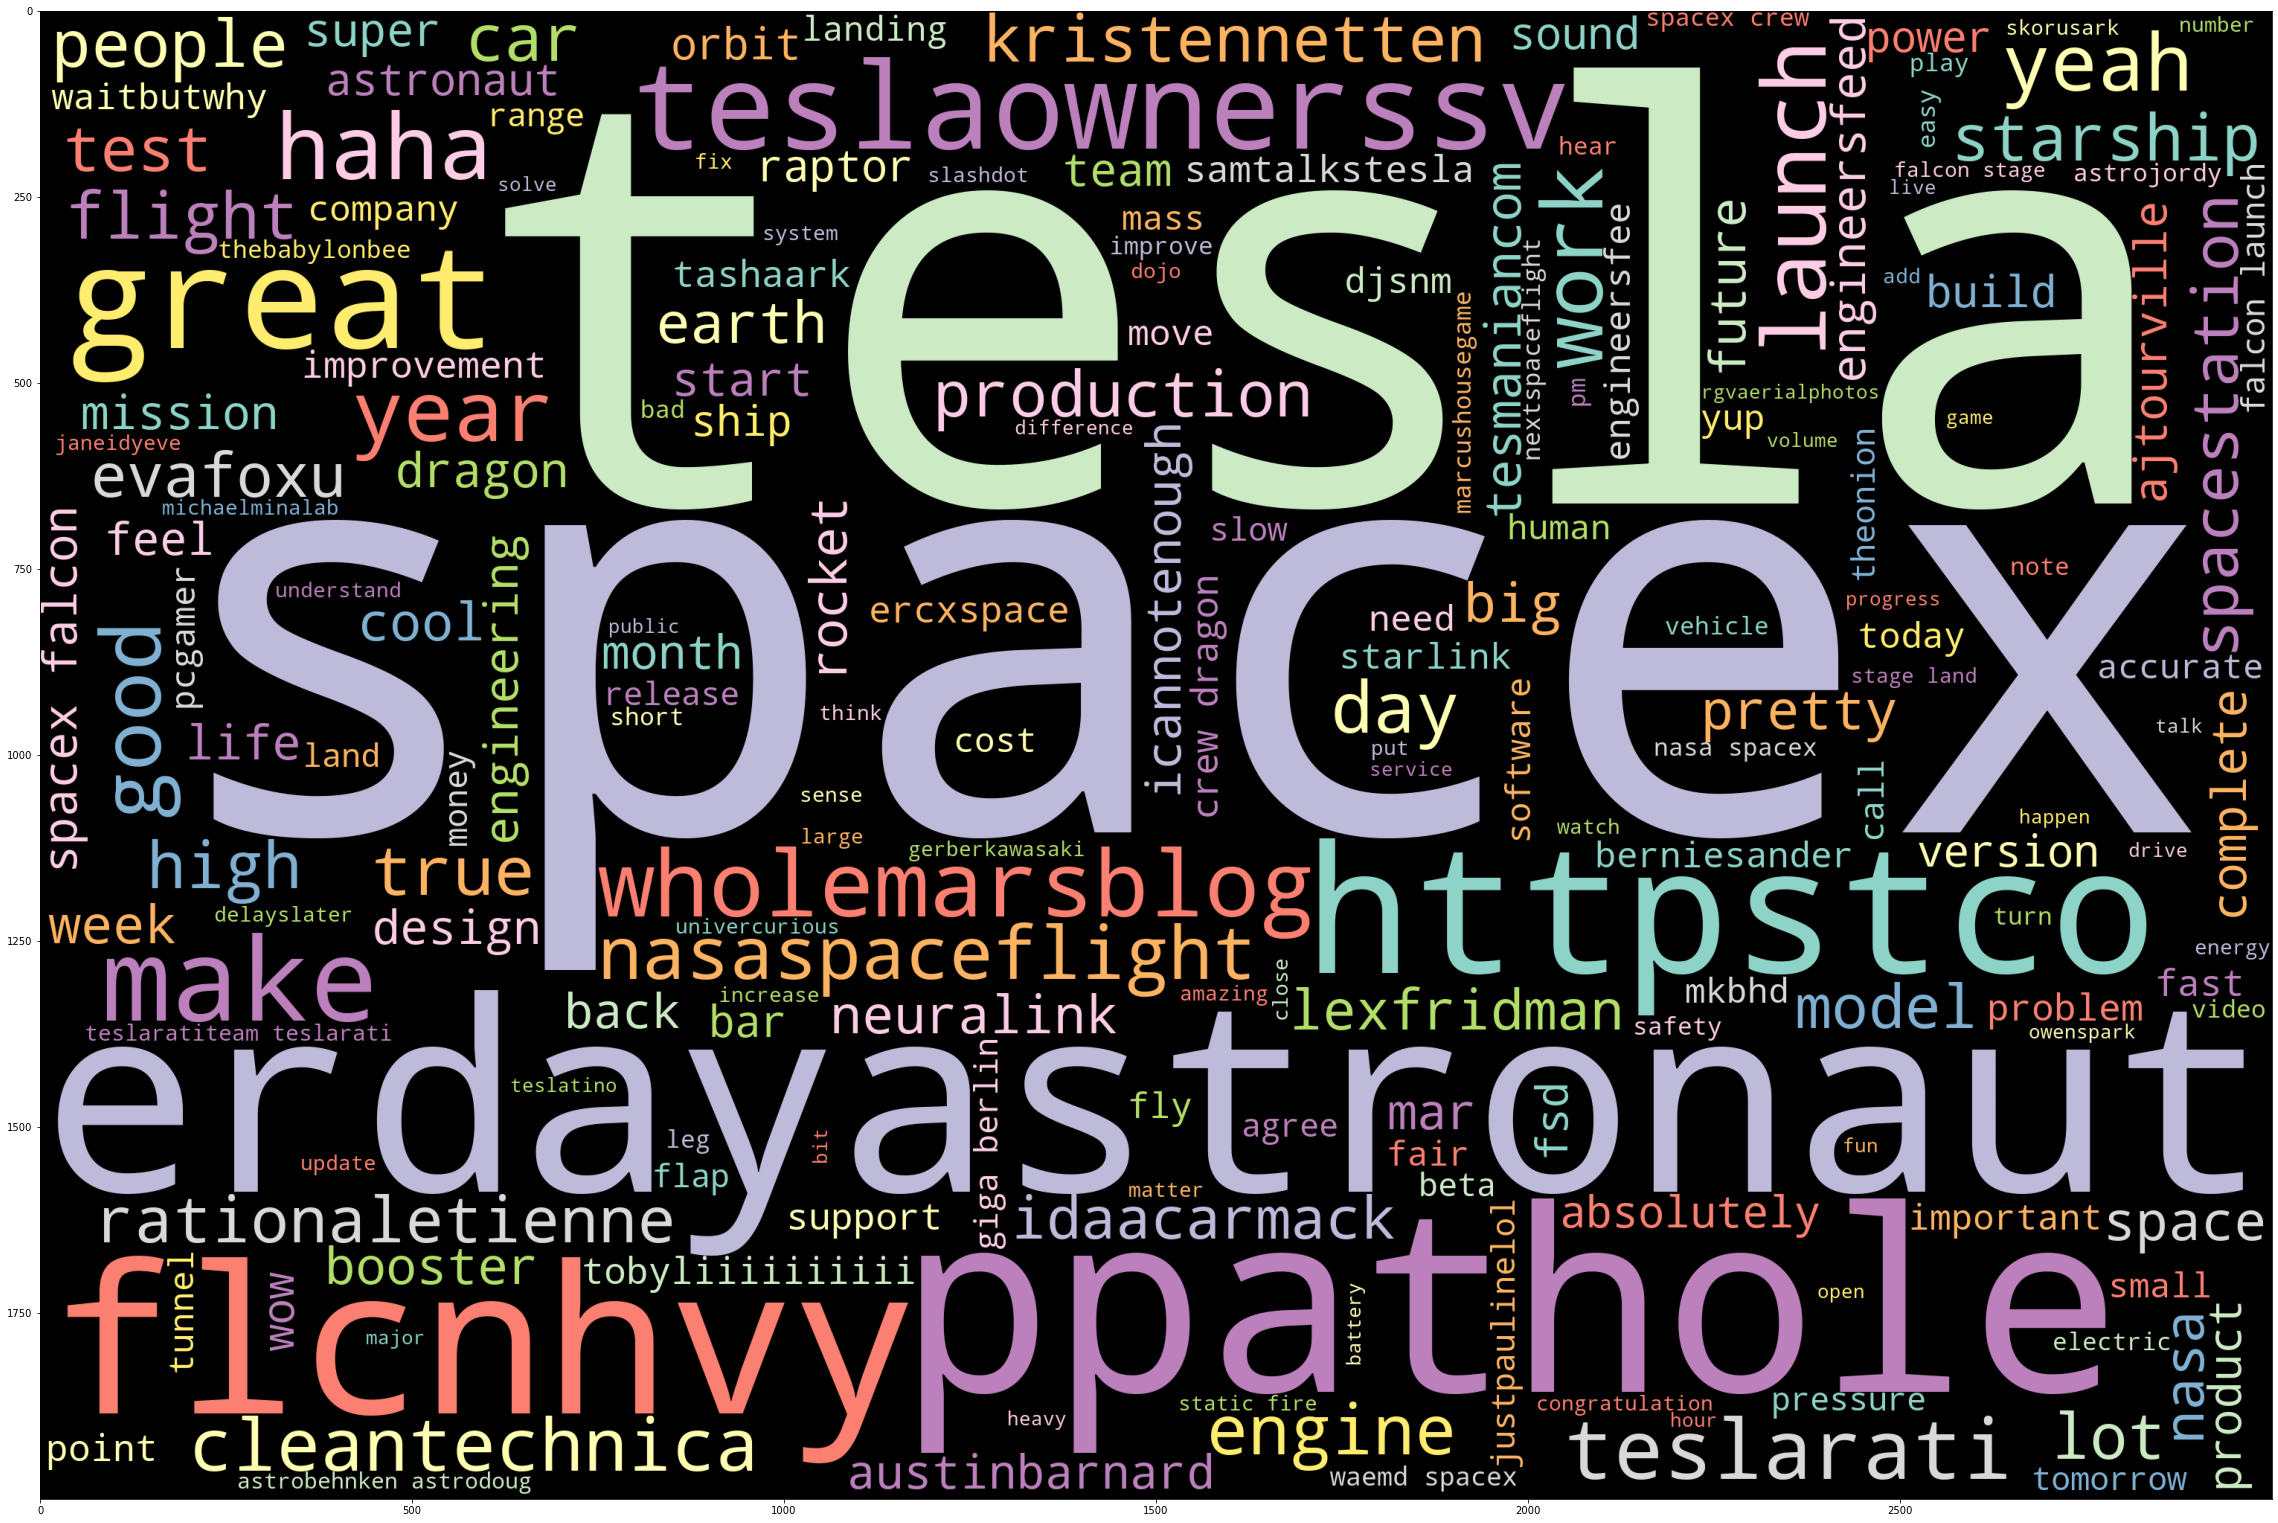

In [27]:
plt.figure(figsize=(40,30))
wordcloud_rev = WordCloud(
                      background_color='black',
                      colormap='Set3_r',
                      width=3000,
                      height=2000,
                     ).generate(clean_reviews)

plt.imshow(wordcloud_rev)

## Sentimental Analysis:



In [28]:
# importing the files for negative and positive words

In [29]:
with open("D:\Study\Excelr DS\Assignments\AS-11-Text-Mining\positive-words.txt","r") as pos:
  pos_words = pos.read().split("\n")
  print(pos_words[:100])

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [30]:
with open("D:\\Study\\Excelr DS\\Assignments\\AS-11-Text-Mining\\negative-words.txt","r") as neg:
  neg_words = neg.read().split("\n")
  print(neg_words[:100])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

### Preprocessing the Data

#### 1. Removing '@mentions'

In [31]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [32]:
tweets['Cleaned_Tweets'] = np.vectorize(remove_pattern)(tweets['Tweets'], "@[\w]*")
tweets.head(11)

,Tweets,Cleaned_Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge,\nAll thought he would..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent r...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


#### 2. Removing links :

In [33]:
clean_tweets = []

for index, row in tweets.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Cleaned_Tweets.split() if 'http' not in word]
    clean_tweets.append(' '.join(words_without_links))

tweets['Cleaned_Tweets'] = clean_tweets
tweets.head(11)

,Tweets,Cleaned_Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


#### 3. Removing duplicate rows :

In [34]:
tweets.drop_duplicates(subset=['Cleaned_Tweets'], keep=False)
tweets.head(11)

,Tweets,Cleaned_Tweets
0,@kunalb11 Im an alien,Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-leve...
2,@joerogan @Spotify Great interview!,Great interview!
3,@gtera27 Doge is underestimated,Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox!
6,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge, All thought he would ..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent rea...
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


#### 4. Removing punctuations, numbers and special characters

In [35]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [36]:
tweets['Cleaned_Tweets'] = tweets['Cleaned_Tweets'].apply(lambda x: clean_text(x))
tweets.head(11)

,Tweets,Cleaned_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


#### 5. Removing emojis

In [37]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [38]:
tweets['Cleaned_Tweets']=tweets['Cleaned_Tweets'].apply(lambda x: remove_emoji(x))
tweets.head(11)

,Tweets,Cleaned_Tweets
0,@kunalb11 Im an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


#### 6. Removing stopwords

In [39]:
tweets_clean = []
for index, row in tweets.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Cleaned_Tweets.split() if not word in stop_words and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    tweets_clean.append(' '.join(words_without_stopwords))
    
tweets['absolute_cleaned_tweets'] = tweets_clean
tweets.head(11)

,Tweets,Cleaned_Tweets,absolute_cleaned_tweets
0,@kunalb11 Im an alien,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,happy year ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...,frodo underdoge thought fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,haha
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...,tweets represent realworld allocation
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome


#### 7. Removing tweets with empty text

In [40]:
tweets = tweets[tweets['absolute_cleaned_tweets']!='']
tweets.head(11)

,Tweets,Cleaned_Tweets,absolute_cleaned_tweets
0,@kunalb11 Im an alien,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,happy year ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...,frodo underdoge thought fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,haha
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...,tweets represent realworld allocation
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome


#### 8. Resetting Index 

In [41]:
tweets = tweets.reset_index(drop=True)
tweets.head(11)

,Tweets,Cleaned_Tweets,absolute_cleaned_tweets
0,@kunalb11 Im an alien,im an alien,im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,ray tracing cyberpunk hdr nextlevel
2,@joerogan @Spotify Great interview!,great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,happy year ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...,frodo underdoge thought fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,haha
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...,tweets represent realworld allocation
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome


#### 9. Tokenize 'absolute_cleaned_tweets'

In [42]:
tokenized_tweet = tweets['absolute_cleaned_tweets'].apply(lambda x: x.split())
tokenized_tweet.head(11)

0                                          [im, alien]
1             [ray, tracing, cyberpunk, hdr, nextlevel]
2                                    [great, interview]
3                                [doge, underestimated]
4     [congratulations, tesla, china, amazing, execu...
5                                     [happy, year, ox]
6                     [frodo, underdoge, thought, fail]
7                                                [haha]
8            [tweets, represent, realworld, allocation]
9                               [entertaining, outcome]
10                                   [agree, clubhouse]
Name: absolute_cleaned_tweets, dtype: object

#### 10. Converting words to lemma

In [43]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Zarna\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                         [im, alien]
1            [ray, tracing, cyberpunk, hdr, nextlevel]
2                                   [great, interview]
3                               [doge, underestimated]
4    [congratulation, tesla, china, amazing, execut...
5                                    [happy, year, ox]
6                    [frodo, underdoge, thought, fail]
7                                               [haha]
8            [tweet, represent, realworld, allocation]
9                              [entertaining, outcome]
Name: absolute_cleaned_tweets, dtype: object

#### 11. Joining all tokens into sentences

In [44]:
# for i, tokens in enumerate(tokenized_tweet):
#     tokenized_tweet[i] = ' '.join(tokens)

tweets['absolute_cleaned_tweets'] = tokenized_tweet
tweets.head(11)

,Tweets,Cleaned_Tweets,absolute_cleaned_tweets
0,@kunalb11 Im an alien,im an alien,"[im, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is nextlevel...,"[ray, tracing, cyberpunk, hdr, nextlevel]"
2,@joerogan @Spotify Great interview!,great interview,"[great, interview]"
3,@gtera27 Doge is underestimated,doge is underestimated,"[doge, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"[congratulation, tesla, china, amazing, execut..."
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox,"[happy, year, ox]"
6,"Frodo was the underdoge,\nAll thought he would...",frodo was the underdoge all thought he would f...,"[frodo, underdoge, thought, fail]"
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks,[haha]
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed tweets definitely do not represent real...,"[tweet, represent, realworld, allocation]"
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,"[entertaining, outcome]"


### Fetching Sentiments

We will do the sentimental analysis in two ways::

1. Manually using the files provided for positive and negative words
2. Using NLTK's SentimentIntensityAnalyzer

#### 1. Manually using the files provided for positive and negative words

In [45]:
# defining function for fetching the sentiments
score = []
def polarity_score(df,column):
    for i in df[column]:
        pol=[]
        for j in i:
            if j in pos_words:
                ps="Positive"
            elif j in neg_words:
                ps="Negative"
            else:
                ps="Neutral"
            pol.append(ps)
        mode = statistics.mode(pol)
        score.append(mode) 

In [46]:
polarity_score(tweets,"absolute_cleaned_tweets")

In [47]:
tweets['Sentiment_value'] = score

In [48]:
tweets[["Tweets","Sentiment_value"]]

,Tweets,Sentiment_value
0,@kunalb11 Im an alien,Neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Neutral
2,@joerogan @Spotify Great interview!,Positive
3,@gtera27 Doge is underestimated,Neutral
4,@teslacn Congratulations Tesla China for amazi...,Neutral
...,...,...
1682,"@flcnhvy True, it sounds so surreal, but the n...",Neutral
1683,@PPathole Make sure to read ur terms &amp; con...,Neutral
1684,@TeslaGong @PPathole Samwise Gamgee,Neutral
1685,@PPathole Altho Dumb and Dumber is <U+0001F525...,Negative


Neutral     1520
Positive     118
Negative      49
Name: Sentiment_value, dtype: int64


<AxesSubplot:ylabel='Sentiment_value'>

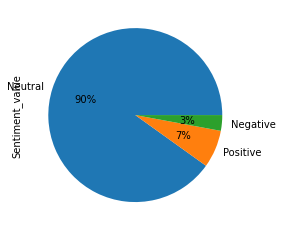

In [49]:
print(tweets.Sentiment_value.value_counts())
tweets.Sentiment_value.value_counts().plot(kind='pie',autopct='%1.0f%%')

As per the files provided for positive and negative words, 90% tweets are neutral, 7% are positive tweets and remaining 3% are negative tweets.

#### 2. Using NLTK's SentimentIntensityAnalyzer

In [50]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(tweets.Cleaned_Tweets[3])

{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.2732}

In [51]:
Score_df=pd.DataFrame()
Score_df['Tweets'] = tweets.Tweets
Score_df['scores'] = tweets['Cleaned_Tweets'].apply(lambda review: sid.polarity_scores(review))
Score_df.head()

,Tweets,scores
0,@kunalb11 Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@joerogan @Spotify Great interview!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
3,@gtera27 Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,@teslacn Congratulations Tesla China for amazi...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."


In [52]:
Score_df['compound']  = Score_df['scores'].apply(lambda scores: scores['compound'])
Score_df.head()

,Tweets,scores,compound
0,@kunalb11 Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,@joerogan @Spotify Great interview!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
3,@gtera27 Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,@teslacn Congratulations Tesla China for amazi...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271


In [53]:
Score_df['sentiment'] = Score_df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
Score_df.head()

,Tweets,scores,compound,sentiment
0,@kunalb11 Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,@joerogan @Spotify Great interview!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive
3,@gtera27 Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,Negative
4,@teslacn Congratulations Tesla China for amazi...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271,Positive


Positive    773
Neutral     688
Negative    226
Name: sentiment, dtype: int64


<AxesSubplot:ylabel='sentiment'>

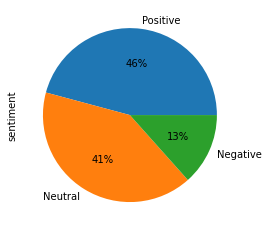

In [54]:
print(Score_df.sentiment.value_counts())
Score_df.sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%')

As per the NLTK's Sentiment Intensity Analyser, around 46% of the tweets are positive, 41% are neutral and 13% are negative.